In [142]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [143]:
data = pd.read_csv('WikiArtClean.csv')

In [144]:
#data

In [145]:
# average rating by artist
data2 = data
data2['Artist mean rating'] = 0.01
for index, row in data2.iterrows():
    artist = row['Artist']
    mean = data[data['Artist']==artist]['Mean rating'].mean()
    data2.at[index, 'Artist mean rating'] = float(mean)
    
data2 = data2.sort_values('Artist mean rating', ascending=False)
data2 = data2[:30]

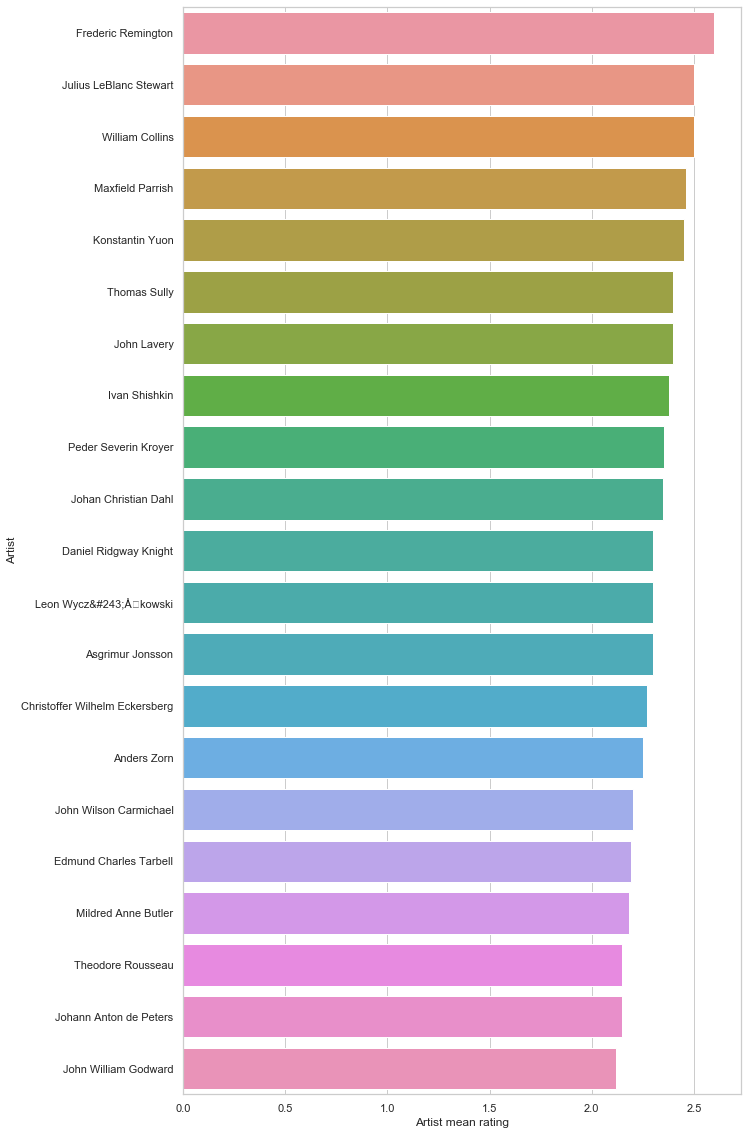

In [146]:
f, ax = plt.subplots(figsize=(10, 20))
sns.set(style="whitegrid")
ax = sns.barplot(x="Artist mean rating", y="Artist", data=data2, ax=ax)
fig = ax.get_figure()
fig.savefig("figs/artist_mean_rating.png")

In [147]:
# face proportion by category
data3 = data
data3['Proportion'] = 0.01
for category in data['Category'].unique():
    if data[data['Category']==category].shape[0] <= 5:
        data3 = data3[data3['Category']!=category]
        
for index, row in data3.iterrows():
    category = row['Category']
    face = len(data3[(data3['Category']==category) & (data3['Face or body']=='face')])
    body = len(data3[(data3['Category']==category) & (data3['Face or body']=='body')])
    total = face + body
    ratio = round(face / total, 3)
    data3.at[index, 'Proportion'] = float(ratio)

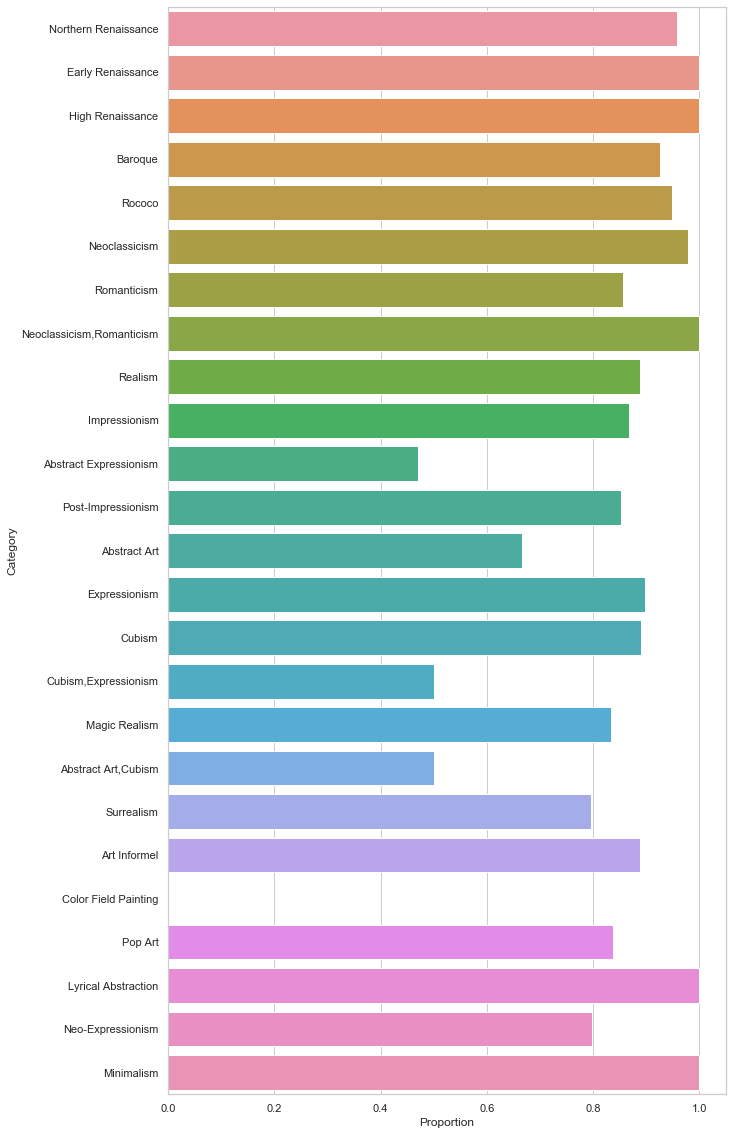

In [148]:
f, ax = plt.subplots(figsize=(10, 20))
sns.set(style="whitegrid")
ax = sns.barplot(x="Proportion", y="Category", data=data3, ax=ax)
fig = ax.get_figure()
fig.savefig("figs/face_proportion.png")

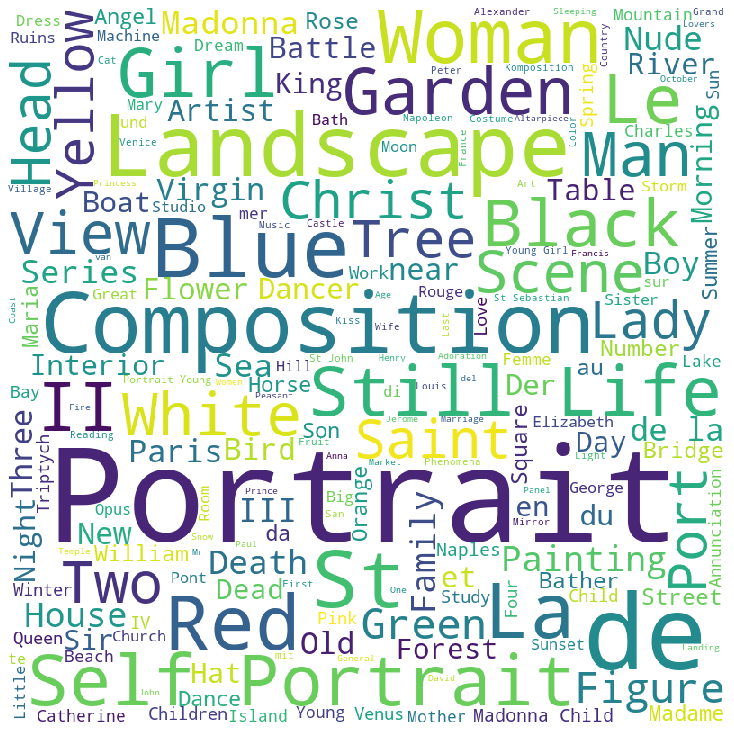

In [149]:
# wordcloud
titles = ''
for title in data['Title']:
    if 'Untitled' not in title:
        tmp = title + ' '
        titles += tmp
        
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width=800, 
                      height=800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(titles) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("figs/wordcloud.png")
plt.show() 